In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
from 2017-05-03_camera import PhotoReceptor

# Grabbing one frame and exiting

 Unix systems 
Before a downscale of 4, dim1 : 720, dim2 : 1280
Using OpenCV3
After a downscale of 4, dim1 : 240.0, dim2 : 320.0
 Raspbian system 
 Unix systems


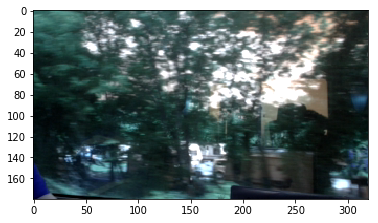

In [3]:
Ph = PhotoReceptor(w=1280, h=720, DOWNSCALE=4)

#Ph.cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640.)
#Ph.cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 360)
#print(Ph.cap.get(cv2.CAP_PROP_FRAME_HEIGHT), Ph.cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#frame = Ph.grab()
frame = Ph.grab()
Ph.close()

plt.imshow(frame)

# Benchmarking camera for different sizes

In [4]:
downscales = 2.**np.arange(5)
downscales = (4/3)**np.arange(5)
downscales = np.hstack(( 1+ 1/np.arange(1,5) , 1))
downscales = np.arange(1, 20) # 
print(downscales)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [ ]:
'''  Version a : Run the program and calculate the framerate (limit = number of frames recorded) '''

num_frames = 50
sizes_a, frames_a = [], []
for ds in downscales:
    
    Ph = PhotoReceptor(w=1280, h=720, DOWNSCALE = ds, verbose=False)
    frame = Ph.grab()

    time.sleep(1)
    start = time.time()

    for i in range(num_frames):
        frame = Ph.grab()

    seconds = time.time() - start
        
    sizes_a.append(Ph.h*Ph.w)
    Ph.close()

    fps = num_frames / seconds
    frames_a.append(fps)
    print ('Frame rate %s : \n' % fps)

Frame rate 30.01263816870059 : 

Frame rate 30.63061036670961 : 

Frame rate 29.941251156623654 : 

Frame rate 30.699352886393694 : 

Frame rate 30.54748427581345 : 

Frame rate 30.582801490734244 : 

Frame rate 30.176689916046676 : 

Frame rate 30.02711121324648 : 

Frame rate 30.035553101071404 : 

Frame rate 30.20111302548576 : 

Frame rate 30.52031695169393 : 

Frame rate 30.0559527612568 : 

Frame rate 30.006634748713005 : 

Frame rate 29.93868225668482 : 

Frame rate 30.08841939499257 : 

Frame rate 30.081211951172424 : 

Frame rate 30.08099621267975 : 

Frame rate 30.596704840961188 : 

Frame rate 30.015920022888878 : 



In [ ]:
''' Version b : Run the program and calculate the framerate (limit = time recorded) '''

sizes_b, frames_b = [], []
for ds in downscales:
    Ph = PhotoReceptor(w=1280, h=720, DOWNSCALE = ds, verbose=False)
    Rec = True
    nb_frames = 0

    start = time.time()

    while(Rec == True):

        frame = Ph.grab()
        nb_frames += 1
        
        seconds = time.time() - start
        
        if seconds >= 10 :
            Rec = False
    sizes_b.append(Ph.h*Ph.w)
           
    Ph.close()

    fps = nb_frames / seconds
    frames_b.append(fps)
    print ('Frame rate : %s \n' % fps)

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(sizes_a, frames_a, 'b', marker='o', label='method a')
ax.plot(sizes_b, frames_b, 'r', marker='o', label='method b')
ax.grid(linestyle='--')
plt.legend()
ax.set_title('Effect of downscale on framerate, per method used')
ax.set_xlabel('# of pixels')
ax.set_ylabel('Framerate')
ax.set_ylim(0, 1.1*max(max(frames_a), max(frames_b)))
plt.show()